In [1]:
import idx2numpy

x_train = idx2numpy.convert_from_file('../dataset/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('../dataset/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('../dataset/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('../dataset/t10k-labels.idx1-ubyte')

In [3]:
img_rows, img_cols = 28, 28
num_classes = 10

# convert class vectors to binary class matrices
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
# convert class vectors to binary class matrices

import keras
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Using TensorFlow backend.
/home/karan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [53]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                36928     
__________

In [54]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
batch_size = 64
#acts = []

In [56]:
history = model.fit(x_train, y_train, 
                    epochs=5, 
                    batch_size=batch_size,
                    validation_split=0.2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 14s 282us/step - loss: 0.1970 - acc: 0.9393 - val_loss: 0.0682 - val_acc: 0.9802
Epoch 2/5
48000/48000 [==============================] - 16s 337us/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0473 - val_acc: 0.9865
Epoch 3/5
48000/48000 [==============================] - 15s 304us/step - loss: 0.0340 - acc: 0.9896 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 4/5
48000/48000 [==============================] - 13s 266us/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0449 - val_acc: 0.9879
Epoch 5/5
48000/48000 [==============================] - 13s 271us/step - loss: 0.0204 - acc: 0.9938 - val_loss: 0.0349 - val_acc: 0.9897


In [ ]:
model.save('mnist.h5')
model.save_weights('mnist_weights.h5')

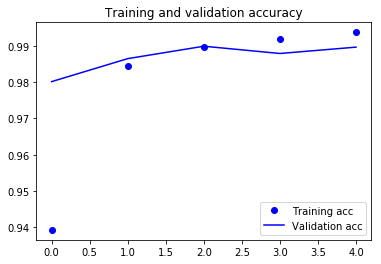

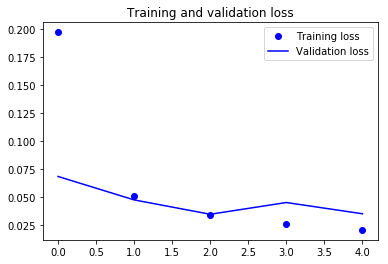

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Random Tests (Do not run following lines)

In [ ]:
'''
for x in range(10):
    exec('tr_{} = []'.format(x))

for x in range(10):
    exec('te_{} = []'.format(x))

for idx, val in enumerate(y_train):
        exec('tr_{}.append(x_train[{}])'.format(val,idx))        

for idx, val in enumerate(y_test):
        exec('te_{}.append(x_test[{}])'.format(val,idx))
        
for x in range(10):    
    exec('te_{} = np.asarray(te_{})'.format(x,x))
    exec('tr_{} = np.asarray(tr_{})'.format(x,x))

tr_0 = tr_0.reshape(tr_0.shape[0], img_rows, img_cols, 1)
te_0 = te_0.reshape(te_0.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

tr_0 = tr_0.astype('float32')
te_0 = te_0.astype('float32')
tr_0 /= 255
te_0 /= 255

'''


'''
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

model2.layers[0].set_weights(model.layers[0].get_weights())
#model2.summary()

#building the dataset for training the other model which has activations as inputs
acts.append(model2.predict(x_train[0:1]))
'''

In [58]:
y_pred = model.predict(x_test)

In [73]:
y_pred.shape

(10000, 10)

In [87]:
a = np.zeros(y_pred.shape)

In [88]:
a

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [89]:
a[0][1]

0.0

In [90]:
for x in range(len(y_pred)):
    a[x][np.argmax(y_pred[x])] = 1

In [91]:
a

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [62]:
import numpy as np

In [63]:
a[np.where(a==np.max(a))] = 1

In [64]:
a

array([[  1.09035535e-12,   2.34259522e-11,   6.14298434e-09, ...,
          1.00000000e+00,   1.54397259e-11,   2.99441822e-08],
       [  8.75021726e-08,   1.11720228e-05,   9.99988437e-01, ...,
          3.95281852e-09,   3.12957393e-09,   5.57764772e-11],
       [  3.07449341e-06,   9.99972343e-01,   6.18873287e-07, ...,
          4.49627396e-06,   4.68312692e-06,   5.32431613e-07],
       ..., 
       [  3.64215570e-15,   5.90895111e-11,   6.37098967e-12, ...,
          1.25983779e-09,   4.30603642e-08,   1.30662094e-08],
       [  2.17480178e-07,   2.29508306e-08,   2.87869417e-09, ...,
          2.14719742e-10,   9.41492468e-02,   1.55789067e-07],
       [  1.30210663e-06,   7.86946597e-09,   9.56978070e-08, ...,
          1.62374385e-11,   7.29502972e-07,   4.31475712e-07]], dtype=float32)

In [45]:
y_test

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, a)

ValueError: multilabel-indicator is not supported

In [42]:
print(y_test)

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [93]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

In [95]:
print(conf_mat)

[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1132    0    2    0    0    0    0    1    0]
 [   1    1 1027    0    0    0    0    3    0    0]
 [   0    0    3 1007    0    0    0    0    0    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    9    0  878    1    0    3    1]
 [   5    2    0    0    2    2  946    0    1    0]
 [   0    4    3    0    0    0    0 1019    1    1]
 [   0    0    1    0    0    0    0    1  971    1]
 [   2    3    0    0    7    3    0    3    6  985]]


In [106]:
class_names = [x for x in range(10)]

In [107]:
print (class_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [117]:
import itertools

Confusion matrix, without normalization
[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1132    0    2    0    0    0    0    1    0]
 [   1    1 1027    0    0    0    0    3    0    0]
 [   0    0    3 1007    0    0    0    0    0    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    9    0  878    1    0    3    1]
 [   5    2    0    0    2    2  946    0    1    0]
 [   0    4    3    0    0    0    0 1019    1    1]
 [   0    0    1    0    0    0    0    1  971    1]
 [   2    3    0    0    7    3    0    3    6  985]]
Normalized confusion matrix
[[  9.97e-01   1.02e-03   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   1.02e-03   1.02e-03   0.00e+00]
 [  0.00e+00   9.97e-01   0.00e+00   1.76e-03   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   8.81e-04   0.00e+00]
 [  9.69e-04   9.69e-04   9.95e-01   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   2.91e-03   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   2.97e-03   9.97e-01   0.00e+00

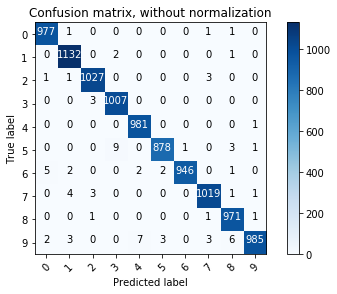

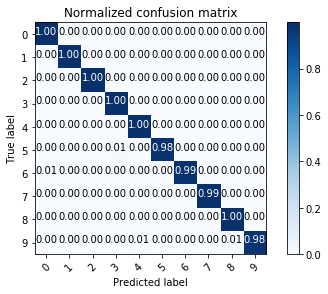

In [118]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_non_category, y_predict_non_category)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()